In [ ]:
import pandas as pd
data=pd.read_csv('/content/sample_data/Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [ ]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [ ]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


[Text(0.5, 1.0, 'Sales_before_digital_add(in $)')]

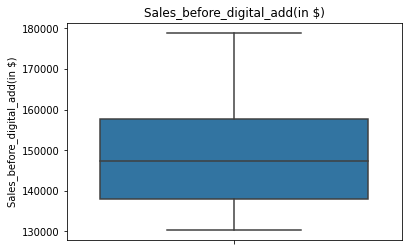

In [20]:
#checking for outliers
import seaborn as sns
sns.boxplot(y='Sales_before_digital_add(in $)',data=data).set(title='Sales_before_digital_add(in $)')

[Text(0.5, 1.0, 'Sales_After_digital_add(in $)')]

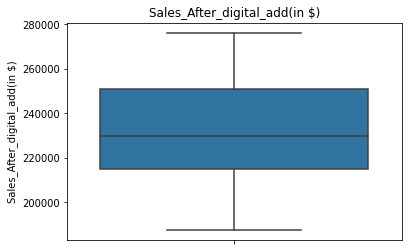

In [21]:
sns.boxplot(y='Sales_After_digital_add(in $)',data=data).set(title='Sales_After_digital_add(in $)')

In [22]:
##from the graphs,we can conclude that there is no outliers in the dataset

In [46]:
#Checking whether there is any increase in sales after stepping into digital marketing.
#H0:There is no increase in sales after stepping into digital marketing
#Ha:There is increase in sales after stepping into digital marketing
from scipy.stats import ttest_rel
sales_before=data[['Sales_before_digital_add(in $)']]
sales_after=data[['Sales_After_digital_add(in $)']]
alpha=0.05
t_score,p=ttest_rel(sales_after,sales_before)
print('t_score=',t_score,'p=',p)

t_score= [12.09070525] p= [6.336667e-11]


In [61]:
import scipy.stats
t_critical=scipy.stats.t.ppf(q=0.05,df=21)
if t_score > t_critical:
    print("Rejecting the Null Hypothesis")
    print("So we conclude that there is increase in sales after stepping into digital marketing.")
else:
    print("failing to reject the Null Hypothesis")
    print('So we conclude that there is no increase in sales after stepping into digital marketing. ')

Rejecting the Null Hypothesis
So we conclude that there is increase in sales after stepping into digital marketing.


In [51]:
#Checking whether there is any dependency between the features “Region” and “Manager”.
#H0:There is no dependency between the features “Region” and “Manager”
#Ha:There is dependency between the features “Region” and “Manager”
from scipy.stats import chi2_contingency
alpha=0.05
stat_value,p_value,df,expected=chi2_contingency(pd.crosstab(data.Region, data.Manager))
print('stat_value=',stat_value,'p=',p_value,'df=',df,'expected values=',expected)

stat_value= 3.050566893424036 p= 0.5493991051158094 df= 4 expected values= [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [59]:
chi2_critical=scipy.stats.chi2.ppf(0.05,4)
if stat_value>chi2_critical:
  print('Rejecting the null hypothesis')
  print('So we conclude that there is dependency between the features “Region” and “Manager”')
else:
    print('Failing to reject the null hypothesis' )
    print('So we conclude that there is no dependency between the features “Region” and “Manager”')

Rejecting the null hypothesis
So we conclude that there is dependency between the features “Region” and “Manager”
